<a href="https://colab.research.google.com/github/hugocbs/IGTI-Machine-Lerning/blob/master/Trabalho_pr%C3%A1tico_1_M%C3%B3dulo_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankel boot']

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

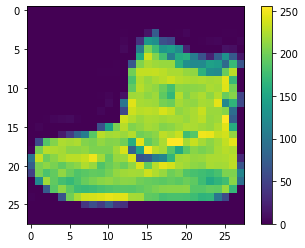

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images = train_images / 255.0
test_images  = test_images / 255.0

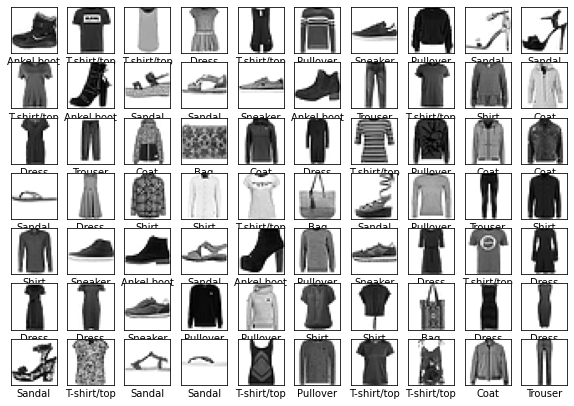

In [ ]:
plt.figure(figsize=(10,10))
for i in range(70):
  plt.subplot(10,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

plt.show()

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4983 - accuracy: 0.8247
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3745 - accuracy: 0.8643
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3370 - accuracy: 0.8771
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3124 - accuracy: 0.8851
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2958 - accuracy: 0.8916
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2811 - accuracy: 0.8962
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2702 - accuracy: 0.8990
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2578 - accuracy: 0.9037
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2493 - accuracy: 0.9066
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.240

In [ ]:
model.fit(test_images, test_labels, epochs=10)

Epoch 1/10
313/313 [==============================] - 1s 2ms/step - loss: 0.3399 - accuracy: 0.8802
Epoch 2/10
313/313 [==============================] - 1s 2ms/step - loss: 0.3015 - accuracy: 0.8905
Epoch 3/10
313/313 [==============================] - 1s 2ms/step - loss: 0.2819 - accuracy: 0.8948
Epoch 4/10
313/313 [==============================] - 1s 2ms/step - loss: 0.2598 - accuracy: 0.9044
Epoch 5/10
313/313 [==============================] - 1s 2ms/step - loss: 0.2513 - accuracy: 0.9064
Epoch 6/10
313/313 [==============================] - 1s 2ms/step - loss: 0.2364 - accuracy: 0.9118
Epoch 7/10
313/313 [==============================] - 1s 2ms/step - loss: 0.2287 - accuracy: 0.9142
Epoch 8/10
313/313 [==============================] - 1s 2ms/step - loss: 0.2139 - accuracy: 0.9206
Epoch 9/10
313/313 [==============================] - 1s 2ms/step - loss: 0.2052 - accuracy: 0.9238
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.1994 - accuracy: 0.9241

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.1785 - accuracy: 0.9331

Test accuracy: 0.9330999851226807


Com o modelo treinado, o usaremos para predições de algumas imagens.

In [ ]:
predictions = model.predict(test_images)

Aqui, o modelo previu que a label de cada imagem no conjunto de treinamento. Vamos olhar na primeira predição:

In [ ]:
predictions[0]

array([5.6214186e-11, 9.4564863e-11, 6.9135531e-11, 3.3579528e-10,
       5.1137837e-11, 3.5836687e-03, 2.7491955e-09, 2.5896611e-02,
       3.0174377e-07, 9.7051930e-01], dtype=float32)

A predição é um array de 10 números. Eles representam um a confiança do modelo que a imagem corresponde a cada um dos diferentes artigos de roupa. Podemos ver cada label tem um maior valor de confiança:

In [ ]:
np.argmax(predictions[0])

9

Então, o modelo é confiante de que esse imagem é uma bota (ankle boot) ou class_names[9]. Examinando a label do teste, vemos que essa classificação é correta:

In [ ]:
test_labels[0]

9

Podemos mostrar graficamente como se parece em um conjunto total de previsão de 10 classes.

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Vamos olhar a previsão imagem na posição 0, do array de predição.

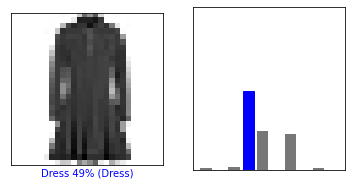

In [ ]:
i = 29
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

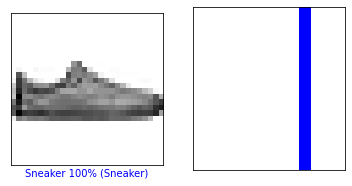

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

Vamos plotar algumas previsões do modelo. Labels preditas corretamente são azuis e as predições erradas são vermelhas. O número dá a porcentagem (de 100) das labels preditas. Note que o modelo pode errar mesmo estão confiante.

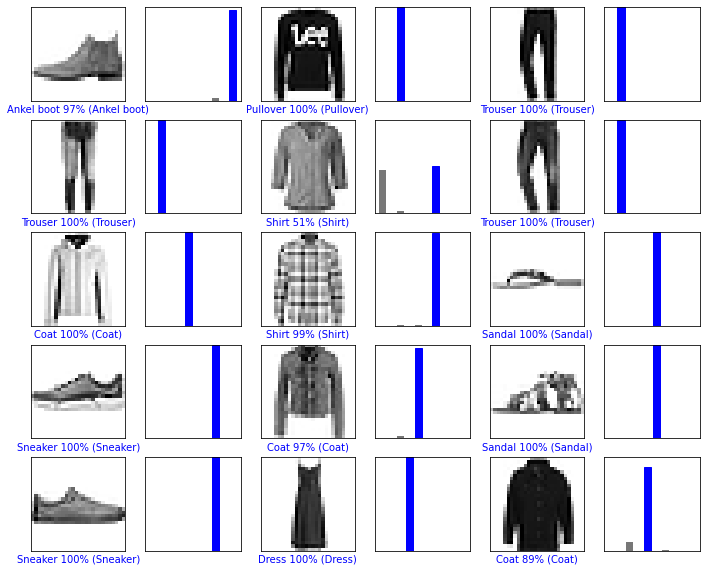

In [ ]:
# Plota o primeiro X test images, e as labels preditas, e as labels verdadeiras.
# Colore as predições corretas de azul e as incorretas de vermelho.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

Finamente, use o modelo treinado para fazer a predição de uma única imagem.

In [ ]:
# Grab an image from the test dataset.
img = test_images[0]

print(img.shape)

(28, 28)


Modelos **tf.keras** são otimizados para fazer predições em um batch, ou coleções, de exemplos de uma vez. De acordo, mesmo que usemos uma única imagem, precisamos adicionar em uma lista:

In [ ]:
# Adiciona a imagem em um batch que possui um só membro.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Agora prediremos a label correta para essa imagem:

In [ ]:
predictions_single = model.predict(img)

print(predictions_single)

[[5.6214085e-11 9.4564516e-11 6.9135281e-11 3.3579531e-10 5.1137840e-11
  3.5836659e-03 2.7491855e-09 2.5896583e-02 3.0174377e-07 9.7051942e-01]]


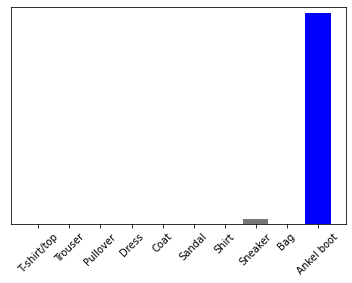

In [ ]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

**model.predict** retorna a lista de listas — uma lista para cada imagem em um batch de dados. Pegue a predição de nossa (única) imagem no batch:

In [ ]:
np.argmax(predictions_single[0])

9

E, como antes, o modelo previu a label como 9.